In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPool2D,Input,Dense,Dropout,BatchNormalization,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
import tensorflow_datasets as tfds
import seaborn as sb

2024-06-20 04:53:28.860287: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-20 04:53:28.860379: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-20 04:53:28.980539: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
dataset,dataset_info=tfds.load('malaria',with_info=True)
def preprocess(data):
    image=data['image']
    label=data['label']
    image=tf.image.resize(image,(100,100))
    image=tf.cast(image,dtype=tf.float32)/255.0
    return {'image':image,'label':label}
dataset=dataset['train'].map(preprocess)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/1.0.0.incomplete235TGU/malaria-train.tfrecord*...:   0%|          …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [3]:
train_proportion=int(len(dataset)*0.8)

train_dataset=dataset.take(train_proportion)

test_proportion=validation_proportion=int(len(dataset)*0.1)

validation_dataset=dataset.skip(train_proportion)
validation_dataset=validation_dataset.take(validation_proportion)

test_dataset=dataset.skip(int(len(dataset)*0.9))
test_dataset=test_dataset.take(test_proportion)

In [4]:
len(train_dataset),len(validation_dataset),len(test_dataset)

(22046, 2755, 2755)

In [5]:
def image_label(dataset):
    image=[]
    label=[]
    for i in dataset:
        image.append(i['image'])
        label.append(i['label'])
    return image,label

In [6]:
test_image,test_label=image_label(test_dataset)

In [7]:
train_image,train_label=image_label(train_dataset)

In [8]:
validation_image,validation_label=image_label(validation_dataset)

In [9]:
def tensor_conversion(value):
    return tf.convert_to_tensor(value)

In [10]:
test_image,test_label=tensor_conversion(test_image),tensor_conversion(test_label)
train_image,train_label=tensor_conversion(train_image),tensor_conversion(train_label)
validation_image,validation_label=tensor_conversion(validation_image),tensor_conversion(validation_label)

In [11]:
i=Input(shape=(100,100,3),name='input_layer')
x=Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu')(i)
x=BatchNormalization()(x)
x=MaxPool2D(pool_size=(2,2))(x)
x=Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu')(x)
x=BatchNormalization()(x)
x=MaxPool2D(pool_size=(2,2))(x)
x=Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu')(x)
x=BatchNormalization()(x)
x=Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu')(x)
x=BatchNormalization()(x)
x=Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu')(x)
x=BatchNormalization()(x)
x=MaxPool2D(pool_size=(2,2))(x)
x=Flatten()(x)

x=Dense(256,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(1,activation='sigmoid')(x)

model=Model(i,x)


In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
model.fit(train_image,train_label,epochs=10,validation_data=(validation_image,validation_label),batch_size=10,shuffle=True)

Epoch 1/10
  12/2205 ━━━━━━━━━━━━━━━━━━━━ 33s 15ms/step - accuracy: 0.5033 - loss: 7.7758

I0000 00:00:1718859328.670396      87 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1718859328.694254      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2205/2205 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7533 - loss: 0.9483

W0000 00:00:1718859353.392988      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1718859354.371282      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2205/2205 ━━━━━━━━━━━━━━━━━━━━ 38s 12ms/step - accuracy: 0.7534 - loss: 0.9481 - val_accuracy: 0.9339 - val_loss: 0.2280
Epoch 2/10
   7/2205 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8694 - loss: 0.2146   

W0000 00:00:1718859356.182088      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2205/2205 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9393 - loss: 0.1983 - val_accuracy: 0.9506 - val_loss: 0.1770
Epoch 3/10
2205/2205 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9479 - loss: 0.1751 - val_accuracy: 0.9270 - val_loss: 0.2260
Epoch 4/10
2205/2205 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9513 - loss: 0.1551 - val_accuracy: 0.9430 - val_loss: 0.1696
Epoch 5/10
2205/2205 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9512 - loss: 0.1440 - val_accuracy: 0.9630 - val_loss: 0.1379
Epoch 6/10
2205/2205 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9552 - loss: 0.1411 - val_accuracy: 0.9601 - val_loss: 0.1462
Epoch 7/10
2205/2205 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9592 - loss: 0.1289 - val_accuracy: 0.9249 - val_loss: 0.2434
Epoch 8/10
2205/2205 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9611 - loss: 0.1175 - val_accuracy: 0.9554 - val_loss: 0.1389
Epoch 9/10
2205/2205 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.9615 - loss: 0.1096 - val

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

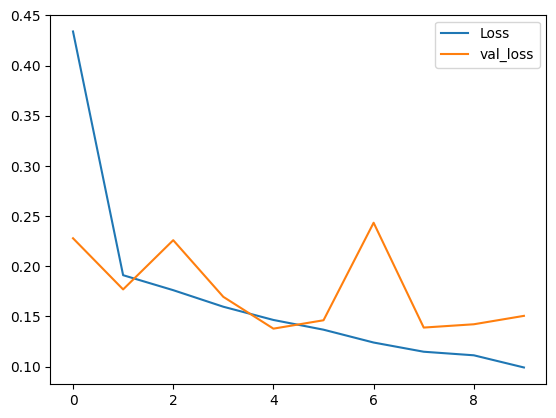

In [14]:
r=model.history.history
sb.lineplot(r['loss'],label='Loss')
sb.lineplot(r['val_loss'],label='val_loss')
plt.legend()

In [15]:
model.evaluate(test_image,test_label)

28/87 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9524 - loss: 0.2314

W0000 00:00:1718859567.010962      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9536 - loss: 0.2055


[0.18685074150562286, 0.9535390138626099]